In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, average_precision_score, precision_score, recall_score, f1_score
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve
import seaborn as sns
import pandas as pd
import openpyxl

In [2]:
data = pd.read_csv('corr.csv',index_col=0)

In [3]:
data.to_excel('corr.xlsx',index=False)

In [9]:
'''
训练集
'''
y_true = list(pd.read_csv('../output/temp_data/train_true_label.csv',index_col=0).iloc[:,0])
pred_proba = list(pd.read_csv('../output/temp_data/train_pred_proba.csv',index_col=0).iloc[:,0])
pred_label = list(pd.read_csv('../output/temp_data/train_pred_label.csv',index_col=0).iloc[:,0])
noattention_true_label = list(pd.read_csv('../output/temp_data/train_noattention_true_label.csv',index_col=0).iloc[:,0])
noattention_pred_proba = list(pd.read_csv('../output/temp_data/train_noattention_pred_proba.csv',index_col=0).iloc[:,0])
noattention_pred_label = list(pd.read_csv('../output/temp_data/train_noattention_pred_label.csv',index_col=0).iloc[:,0])
attention_true_label = list(pd.read_csv('../output/temp_data/train_attention_true_label.csv',index_col=0).iloc[:,0])
attention_pred_proba = list(pd.read_csv('../output/temp_data/train_attention_pred_proba.csv',index_col=0).iloc[:,0])
attention_pred_label = list(pd.read_csv('../output/temp_data/train_attention_pred_label.csv',index_col=0).iloc[:,0])

In [24]:
'''
内部验证集
'''
y_true = list(pd.read_csv('../output/temp_data/test_true_label.csv',index_col=0).iloc[:,0])
pred_proba = list(pd.read_csv('../output/temp_data/test_pred_proba.csv',index_col=0).iloc[:,0])
pred_label = list(pd.read_csv('../output/temp_data/test_pred_label.csv',index_col=0).iloc[:,0])
noattention_true_label = list(pd.read_csv('../output/temp_data/test_noattention_true_label.csv',index_col=0).iloc[:,0])
noattention_pred_proba = list(pd.read_csv('../output/temp_data/test_noattention_pred_proba.csv',index_col=0).iloc[:,0])
noattention_pred_label = list(pd.read_csv('../output/temp_data/test_noattention_pred_label.csv',index_col=0).iloc[:,0])
attention_true_label = list(pd.read_csv('../output/temp_data/test_attention_true_label.csv',index_col=0).iloc[:,0])
attention_pred_proba = list(pd.read_csv('../output/temp_data/test_attention_pred_proba.csv',index_col=0).iloc[:,0])
attention_pred_label = list(pd.read_csv('../output/temp_data/test_attention_pred_label.csv',index_col=0).iloc[:,0])

In [22]:
'''
外部验证集
'''
y_true = list(pd.read_csv('../output/temp_data/validation_true_label.csv',index_col=0).iloc[:,0])
pred_proba = list(pd.read_csv('../output/temp_data/validation_pred_proba.csv',index_col=0).iloc[:,0])
pred_label = list(pd.read_csv('../output/temp_data/validation_pred_label.csv',index_col=0).iloc[:,0])
noattention_true_label = list(pd.read_csv('../output/temp_data/validation_noattention_true_label.csv',index_col=0).iloc[:,0])
noattention_pred_proba = list(pd.read_csv('../output/temp_data/validation_noattention_pred_proba.csv',index_col=0).iloc[:,0])
noattention_pred_label = list(pd.read_csv('../output/temp_data/validation_noattention_pred_label.csv',index_col=0).iloc[:,0])
attention_true_label = list(pd.read_csv('../output/temp_data/validation_attention_true_label.csv',index_col=0).iloc[:,0])
attention_pred_proba = list(pd.read_csv('../output/temp_data/validation_attention_pred_proba.csv',index_col=0).iloc[:,0])
attention_pred_label = list(pd.read_csv('../output/temp_data/validation_attention_pred_label.csv',index_col=0).iloc[:,0])

In [3]:
fpr, tpr, _ = roc_curve(y_true, pred_proba)
roc_auc = auc(fpr, tpr)

In [17]:
print(fpr[80:90])
print(tpr[80:90])

[0.0206501  0.0210325  0.02256214 0.03594646 0.03594646 0.03594646
 0.03594646 0.03594646 0.03594646 0.03594646]
[0.38242332 0.38242332 0.38242332 0.38242332 0.40700457 0.41331303
 0.4144007  0.41744616 0.41788123 0.42462476]


In [16]:
for i in range(len(fpr)):
    if(fpr[i]>0.03 and fpr[i]<0.04):
        print(i)

83
84
85
86
87
88
89
90


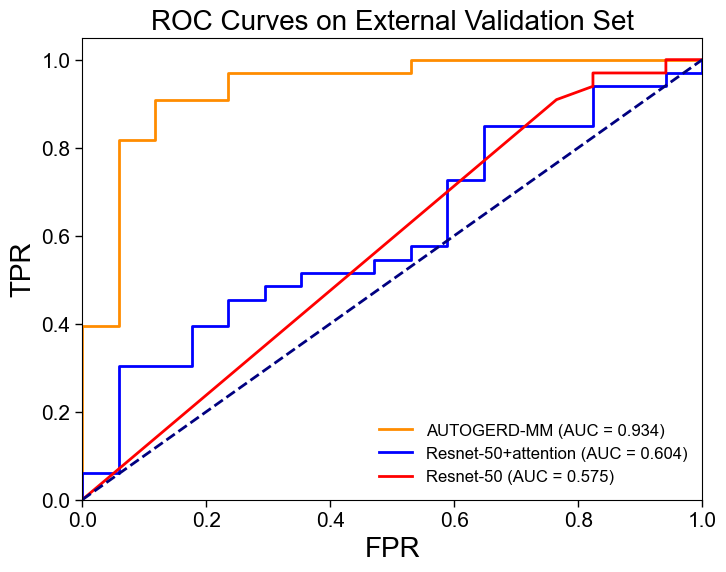

In [14]:
# 1. ROC曲线
fpr, tpr, _ = roc_curve(y_true, pred_proba)
roc_auc = auc(fpr, tpr)
# roc_auc_score(y_true,pred_label)

plt.rcParams.update({'font.size':15})
plt.rc('font',family='Arial')
# plt.style.use("ggplot")
plt.figure(figsize=(8, 6), facecolor='white')  # 设置图形背景为白色
ax = plt.gca()  # 获取当前坐标轴
ax.set_facecolor('white') 
ax.tick_params(axis="both", which="major", direction="out", width=1, length=5, labelsize=15)
ax.tick_params(axis="both", which="minor", direction="out", width=1, length=3, labelsize=15)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUTOGERD-MM (AUC = {roc_auc:.3f})')
fpr, tpr, _ = roc_curve(noattention_true_label, noattention_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Resnet-50+attention (AUC = {roc_auc:.3f})')
fpr, tpr, _ = roc_curve(attention_true_label, attention_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red', lw=2, label=f'Resnet-50 (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR',fontsize=20)
plt.ylabel('TPR',fontsize=20)
plt.title('ROC Curves on External Validation Set',fontsize=20)
# plt.title('ROC Curves on Training Set',fontsize=20)
# plt.title('ROC Curves on Internal Validation Set',fontsize=20)
plt.legend(loc="lower right",frameon=False,fontsize=12)
plt.savefig('../output/image/External_ROC.svg',dpi=1000)
# plt.savefig('../output/image/Train_ROC.svg',dpi=1000)
# plt.savefig('../output/image/Internal_ROC.svg',dpi=1000)
plt.show()

KeyboardInterrupt: 

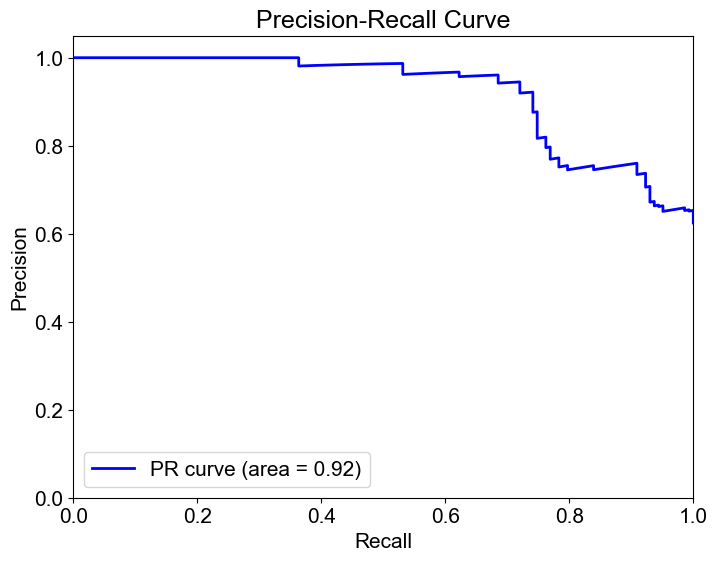

In [13]:
# 2. PR曲线
precision, recall, _ = precision_recall_curve(y_true, pred_proba)
average_precision = average_precision_score(y_true, pred_proba)

plt.rcParams.update({'font.size':15})
plt.rc('font',family='Arial')
# plt.style.use("ggplot")
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {average_precision:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.savefig('../output/image/Validation_PR.png',dpi=5000)
plt.show()

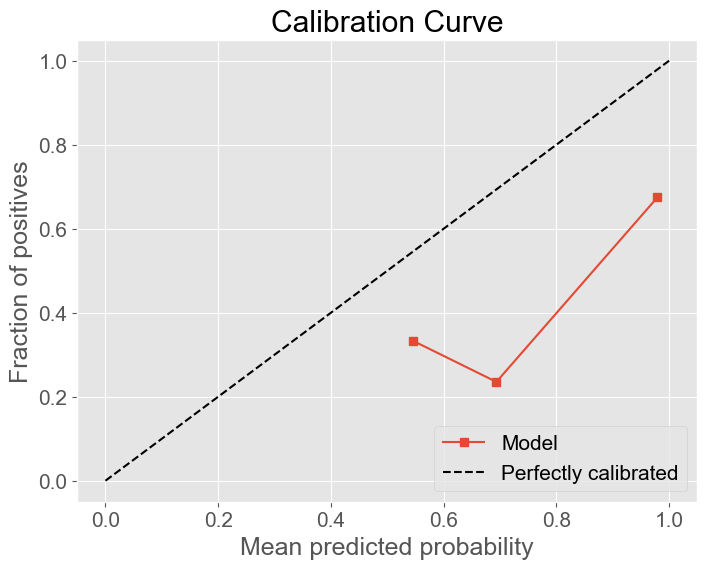

In [36]:
# 3. 校准曲线
prob_true, prob_pred = calibration_curve(y_true, pred_proba, n_bins=5)

plt.rcParams.update({'font.size':15})
plt.rc('font',family='Arial')
# plt.style.use("ggplot")
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, 's-', label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.legend(loc="lower right")
# plt.savefig('../output/image/Validation_校准曲线.png',dpi=10000)
plt.show()

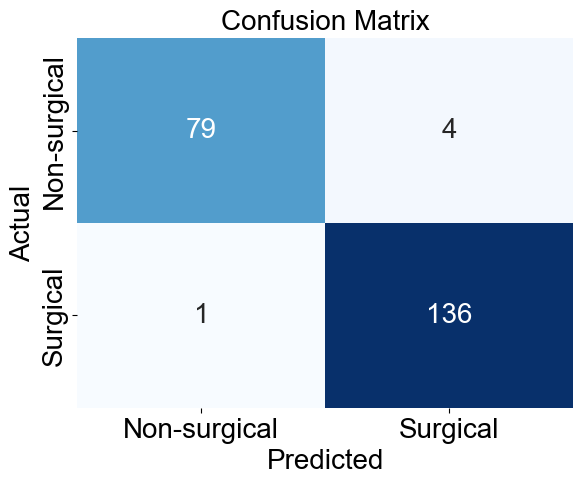

In [25]:
# 4. 混淆矩阵热图
cm = confusion_matrix(y_true, pred_label)

# plt.rcParams.update({'font.size':15})
plt.rc('font',family='Arial')
# plt.style.use("ggplot")
plt.figure()
sns.heatmap(cm, annot=True, annot_kws={'size':15},cbar=False,fmt='d', cmap='Blues',
            xticklabels=['Non-surgical', 'Surgical'],
            yticklabels=['Non-surgical', 'Surgical'])
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
ax = plt.gca()
for t in ax.texts:
    t.set_fontsize(20)
ax.tick_params(axis='both', which='major', labelsize=20)
# plt.title('External validation')
plt.title('Confusion Matrix',fontsize=20)
plt.savefig('../output/image/Internal_混淆矩阵.svg',dpi=1000,bbox_inches='tight')
plt.show()

In [17]:
'''
院外数据处理
'''

'\n院外数据处理\n'

In [25]:
train_data = pd.read_csv('../output/temp_data/train.csv',index_col=0).iloc[0:2,:]
data = pd.read_csv('----------------.csv',index_col=0)

In [26]:
data.drop('LA',axis=1,inplace=True)

In [27]:
data.rename(columns={'患者':'path'},inplace=True)

In [28]:
final = pd.concat([train_data,data])

In [29]:
final.fillna(0,inplace=True)

In [30]:
final = final.iloc[2:,:]

In [31]:
name_list_drop = ['周翔','刘献','张明明','施蔚蔚','聂坤']
index_drop = []
for i in range(final.shape[0]):
    if(final.iloc[i,0] in name_list_drop):
        index_drop.append(i)

In [32]:
final.drop(index=index_drop,inplace=True)

In [33]:
final.reset_index(drop=True,inplace=True)

In [32]:
x

,path,label,WMT,RE,TRE,PUT,PST,PTT,TRAC,LRE,...,LESP,LES-IRP,DL,DCI,LES-length,IBP,PIP,HH,PC,SC
0,乔东菊,0,83910.0,0.0,878.0,1.8,0.0,0.0,46.0,181.0,...,9.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,刘道奇,1,84840.0,0.0,4427.0,3.2,0.0,0.0,87.0,825.0,...,15.0,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,卜科涛,1,84782.0,0.0,35067.0,54.8,0.0,0.0,141.0,2410.0,...,8.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,乔东菊,0,83910.0,0.0,878.0,1.8,0.0,0.0,46.0,181.0,...,9.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
x = pd.concat([final.iloc[0:3,:],pd.DataFrame(final.iloc[0,:]).T])

In [20]:
x

,path,label,WMT,RE,TRE,PUT,PST,PTT,TRAC,LRE,...,LESP,LES-IRP,DL,DCI,LES-length,IBP,PIP,HH,PC,SC
0,乔东菊,0,83910.0,0.0,878.0,1.8,0.0,0.0,46.0,181.0,...,9.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,刘道奇,1,84840.0,0.0,4427.0,3.2,0.0,0.0,87.0,825.0,...,15.0,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,卜科涛,1,84782.0,0.0,35067.0,54.8,0.0,0.0,141.0,2410.0,...,8.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
dup_name = ['卜科涛','曹海龙','陈超','陈惠芳','陈长凡','樊荣','古燕新','郭爱社','韩作星','黄捷舜']
for i in range(final.shape[0]):
    if(final.iloc[i,0] in dup_name):
        temp = pd.DataFrame(final.iloc[i,:]).T
        final.iloc[i,0] = '../output/validation/' + final.iloc[i,0] + '_1.jpg'
        temp.iloc[0,0] = '../output/validation/' + temp.iloc[0,0] + '_2.jpg'
        final = pd.concat([final,temp])
    else:
        final.iloc[i,0] = '../output/validation/' + final.iloc[i,0] + '.jpg'
final.reset_index(drop=True,inplace=True)

In [35]:
final.to_csv('../output/temp_data/validation.csv')

In [48]:
final.head(5)

,path,label,WMT,RE,TRE,PUT,PST,PTT,TRAC,LRE,...,LESP,LES-IRP,DL,DCI,LES-length,IBP,PIP,HH,PC,SC
0,../output/validation/乔东菊.jpg,0,83910.0,0.0,878.0,1.8,0.0,0.0,46.0,181.0,...,9.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,../output/validation/刘道奇.jpg,1,84840.0,0.0,4427.0,3.2,0.0,0.0,87.0,825.0,...,15.0,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,../output/validation/卜科涛_1.jpg,1,84782.0,0.0,35067.0,54.8,0.0,0.0,141.0,2410.0,...,8.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,../output/validation/古燕新_1.jpg,0,82299.0,0.0,577.0,0.7,0.0,0.0,34.0,151.0,...,16.0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,../output/validation/吴俊辉.jpg,0,82889.0,0.0,3626.0,8.2,0.0,0.0,95.0,693.0,...,7.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
type(final.iloc[12,-9])

str

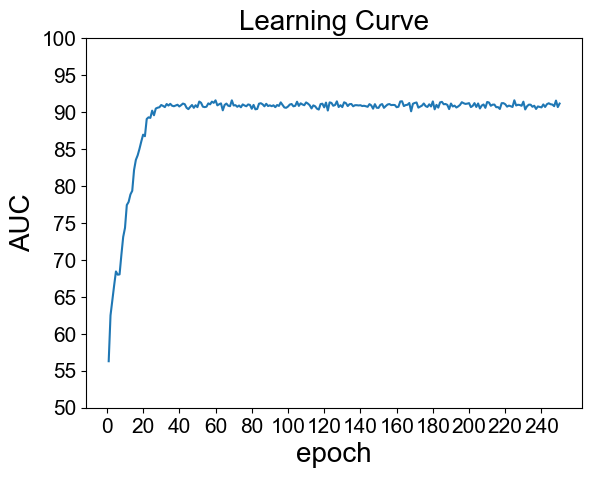

In [19]:
record_train = pd.read_csv('../output/temp_data/record_train.csv',index_col=0)
train_AUC = pd.read_csv('../output/temp_data/train_AUC.csv',index_col=0)
# plt.style.use("ggplot")
ax.tick_params(axis="both", which="major", direction="out", width=1, length=5, labelsize=15)
ax.tick_params(axis="both", which="minor", direction="out", width=1, length=3, labelsize=15)
plt.ylim(50, 100) 
plt.rcParams.update({'font.size':15})
plt.rc('font',family='Arial')
# plt.plot(range(1, len(record_train) + 1), record_train, label="train acc")
plt.plot(range(1, len(train_AUC) + 1), train_AUC, label="train auc")
# plt.legend(loc=4,frameon=False,fontsize=12)
plt.title("Learning Curve",fontsize=20)   
plt.xticks(range(0, len(record_train) + 1, 20))
plt.yticks(range(50, 101, 5))
plt.xlabel("epoch",fontsize=20)
plt.ylabel("AUC",fontsize=20)
plt.savefig('Epoch_AUC.svg',dpi=1000,bbox_inches='tight')
plt.show()

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 示例数据集
df = pd.read_csv('corr.csv',index_col=0)
df.columns = ['WMT', 'RE', 'TRE', 'PUT', 'PST', 'PTT', 'TRAC', 'LRE', 'DMS',
       'RE-L-Ac', 'RE-L-Wa', 'RE-L-Al', 'RE-L-Ak', 'RE-M-Ac', 'RE-M-Wa',
       'RE-M-Al', 'RE-M-Ak', 'RE-T-Ac', 'RE-T-Wa', 'RE-T-Al', 'RE-T-Ak', 'CFV',
       'LESP', 'LES-IRP', 'DL', 'DCI', 'LES-length', 'IBP', 'PIP', 'HH', 'PC',
       'SC']

In [42]:
df.columns

Index(['WMT', 'RE', 'TRE', 'PUT', 'PST', 'PTT', 'TRAC', 'LRE', 'DMS',
       'RE-L-Ac', 'RE-L-Wa', 'RE-L-Al', 'RE-L-Ak', 'RE-M-Ac', 'RE-M-Wa',
       'RE-M-Al', 'RE-M-Ak', 'RE-T-Ac', 'RE-T-Wa', 'RE-T-Al', 'RE-T-Ak', 'CFV',
       'LESP', 'LES-IRP', 'DL', 'DCI', 'LES-length', 'IBP', 'PIP', 'HH', 'PC',
       'SC'],
      dtype='object')

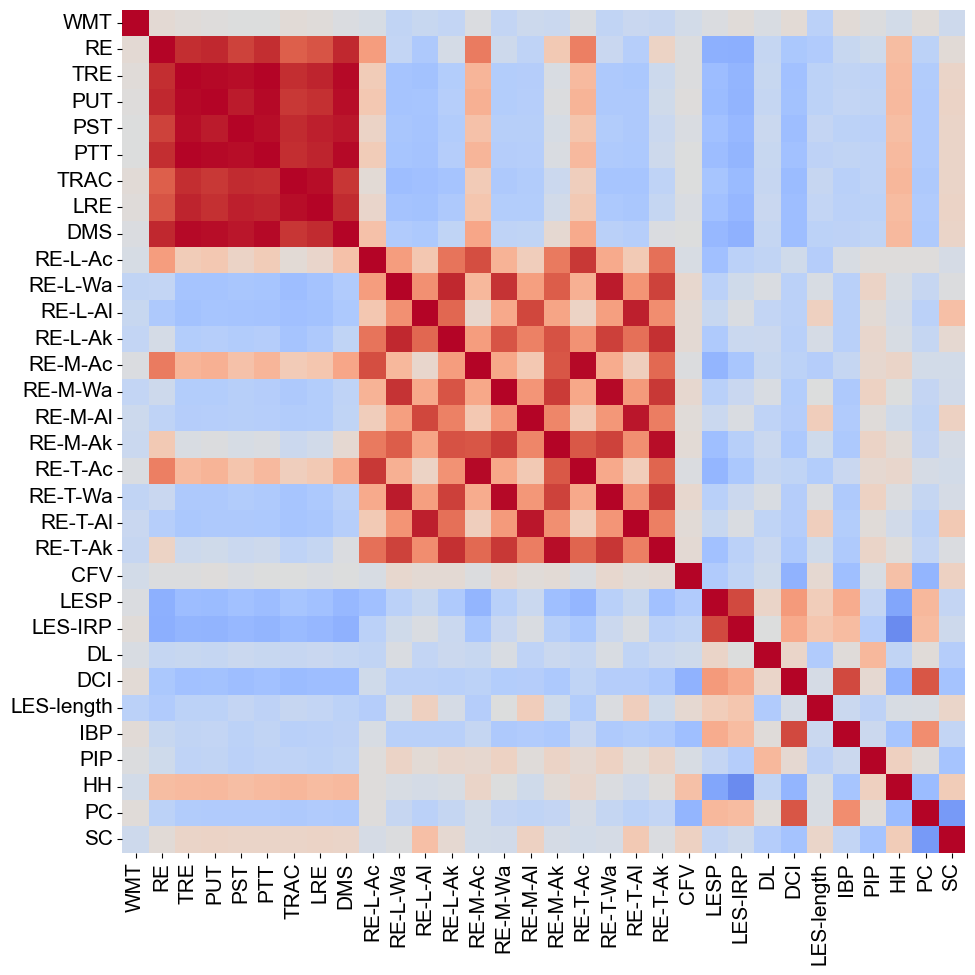

In [56]:
# 计算相关性矩阵
corr_matrix = df.corr()

# 使用Seaborn和Matplotlib绘制相关性矩阵
plt.figure(figsize=(10,10))
ax.tick_params(axis="both", which="major", direction="out", width=1, length=5, labelsize=15)
ax.tick_params(axis="both", which="minor", direction="out", width=1, length=3, labelsize=15)
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm',cbar=False, vmin=-1, vmax=1)
plt.xticks(ticks=np.arange(len(df.columns)) + 0.5, labels=df.columns, rotation=90)
plt.yticks(ticks=np.arange(len(df.columns)) + 0.5, labels=df.columns, rotation=0)
plt.title('')
plt.tight_layout()
plt.savefig('Correlation Matrix.svg',dpi=1000)
plt.show()